<a href="https://colab.research.google.com/github/Munfred/ACM104extra/blob/main/ACM104_extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import io
import requests
import networkx as nx
import matplotlib.pyplot as plt
import operator
import random as rd
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams['figure.figsize'] = (5, 5)
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random


# Truncated SVD and PCA implementation compared with sklearn 









In [127]:

# We implement SVD using the power method following
# this reference: https://www.cs.princeton.edu/courses/archive/fall18/cos521/Lectures/lec14.pdf
# and this https://jeremykun.com/2016/05/16/singular-value-decomposition-part-2-theorem-proof-algorithm/


def make_random_unit_vector(d):
    random_vector= np.random.rand(d)
    random_unit_vector = random_vector/np.linalg.norm(random_vector)
    return random_unit_vector

def run_1d_power_method(A, num_iter=1000):
    n, d = A.shape
    vector = make_random_unit_vector(d)
    # calculate A^T*A for the pwoer method
    B = np.dot(np.transpose(A), A)
    # we just do an arbitrary number of iterations and hope it converges
    for i in range(num_iter):
        vector=np.dot(B, vector)
        #normalize the vector
        vector=vector/np.linalg.norm(vector)
    return vector

def svd(A):
    n, m = A.shape
    svd_list = []
 
    for i in range(m):
        A_copy = A.copy()
 
        for singularValue, u, v in svd_list[:i]:
            A_copy = A_copy -  singularValue * np.outer(u, v)
 
        v = run_1d_power_method(A_copy, num_iter=100)  # singular vector
        u = np.dot(A, v)/np.linalg.norm(np.dot(A, v))
        sigma = np.linalg.norm(np.dot(A, v))  # singular value
 
        svd_list.append((sigma, u, v))
 
    # transform it into matrices of the right shape
    singular_values, U, V = [np.array(x) for x in zip(*svd_list)]

    return singular_values, U.T, V


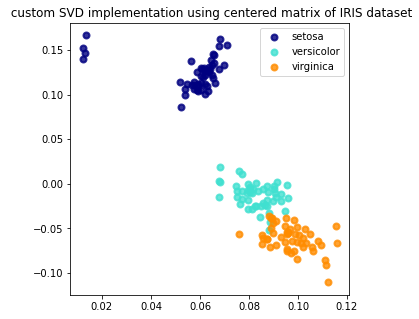

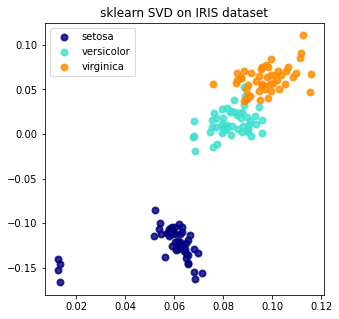

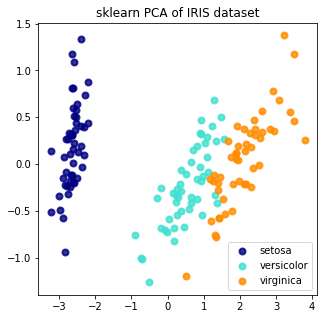

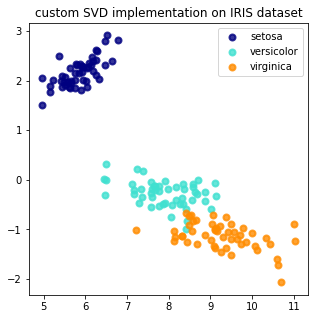

In [128]:
### plot SVD and PCA from sklearn on iris datast and compare with the manual SVD

sklearn_svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
X_sklearn_svd = sklearn_svd.fit(X).transform(X)

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

sklearn_pca = PCA(n_components=2)
X_r = sklearn_pca.fit(X).transform(X)

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

iris_matrix_centered= iris_matrix
for rownum in range(iris_matrix_centered.shape[1]):
    iris_matrix_centered[rownum]=iris_matrix_centered[rownum]-iris_matrix_centered[rownum].mean()

singular_values_PCA, U_SVD_iris_matrix_PCA, V_SVD_iris_matrix_PCA = svd(iris_matrix_centered)
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(U_SVD_iris_matrix_PCA[:,:2][y == i, 0], U_SVD_iris_matrix_PCA[:,:2][y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title(' custom SVD implementation using centered matrix of IRIS dataset')
plt.show()

singular_vlaues, U_SVD_iris_matrix, V_SVD_iris_matrix = svd(iris_matrix)
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(U_SVD_iris_matrix[:,:2][y == i, 0], U_SVD_iris_matrix[:,:2][y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('sklearn SVD on IRIS dataset')
plt.show()


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('sklearn PCA of IRIS dataset')
plt.show()

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_sklearn_svd[:,:2][y == i, 0], X_sklearn_svd[:,:2][y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('custom SVD implementation on IRIS dataset')
plt.show()



In [136]:
np.array(Y)

array([[ 0.1, -0.2],
       [ 0.9,  1.1],
       [ 6.2,  5.9],
       [11.9, 12.3]])

In [135]:
np.array(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [2., 2., 2.],
       [3., 5., 4.]])

# Page rank implemmentaiton with airport dataset

In [ ]:

url="https://raw.githubusercontent.com/Munfred/ACM104extra/main/US_largest500_airportnetwork.csv"
s=requests.get(url).content
airport_dataset=pd.read_csv(io.StringIO(s.decode('utf-8')))
airport_dataset=airport_dataset[['node1','node2','traffic']].fillna(30)
airport_dataset

In [ ]:
# put dataset in matrix, get around parsing error by filling wrong values with 499
airport_matrix=np.zeros(500)
for index, row in airport_dataset.iterrows():
    entry1=row['node1'].astype(int)
    if row['node2'] > 500: 
        entry2=499
    else:
        entry2=row['node2'].astype(int)
    airport_matrix[[entry1,entry2]]=row['traffic']
for i in range(500):
    airport_matrix[i:]=airport_matrix[i:]/airport_matrix[i:].sum()


In [ ]:
airport_matrix[1:].sum()

7.677629229734507

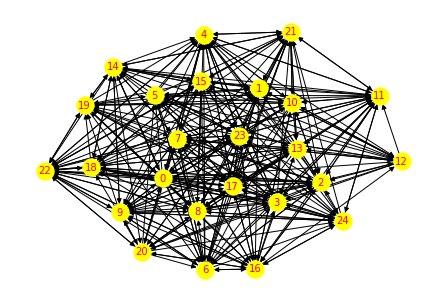

In [ ]:
# created a directed graph
graph=nx.gnp_random_graph(25,0.6,directed=True)
#draw a graph
nx.draw(graph,with_labels=True,font_color='red',font_size=10,node_color='yellow')
#plot a graph
plt.show()

In [ ]:
#number of nodes for graph
count=graph.number_of_nodes()
#graph neighbours of a node 1
print(list(graph.neighbors(1)))

[0, 2, 4, 5, 6, 11, 12, 15, 16, 17, 20, 21, 22]
